In [108]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [109]:
np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int) * 2 - 1

X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int) * 2 - 1 

X_val = np.random.rand(200, 2) * 2 - 1
y_val = np.logical_xor(X_val[:, 0] > 0, X_val[:, 1] > 0).astype(int) * 2 - 1 

In [110]:
def plot_decision_surface(model, X, y, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [111]:
def plot_decision_surface_logistic(model, X, y, title, poly):
    h = .02 
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)

    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

MLP accuracy: 0.95


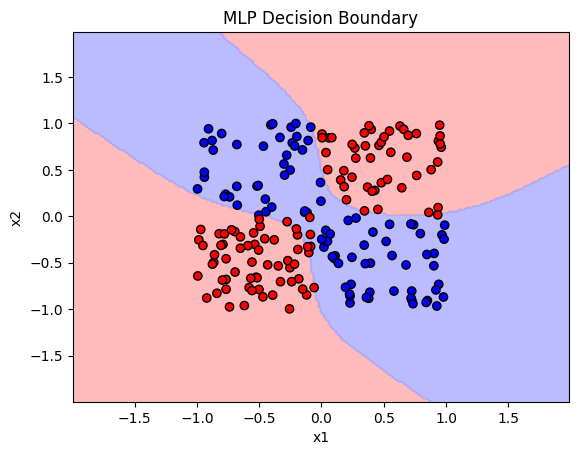

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='adam',max_iter=2000, random_state= 0)
mlp.fit(X_train, y_train)
print(f"MLP accuracy: {mlp.score(X_test, y_test)}")
plot_decision_surface(mlp, X_test, y_test, title="MLP Decision Boundary")

In [113]:
def line_search(alpha_range):
    best_alpha = None
    best_criterion = float('-inf')

    for alpha in alpha_range:
        mlp_l2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0, alpha=alpha, solver='adam', activation='tanh')
        mlp_l2.fit(X_train, y_train)
        accuracy = mlp_l2.score(X_val, y_val)
        print(f"Accuracy with penalty coefficient {alpha}: {accuracy}")
        if accuracy > best_criterion:
            best_alpha = alpha
            best_criterion = accuracy

    return best_alpha

alpha_range = [0, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

best_alpha = line_search(alpha_range)
print(f"The best alpha value is: {best_alpha}")


Accuracy with penalty coefficient 0: 0.94
Accuracy with penalty coefficient 0.001: 0.94
Accuracy with penalty coefficient 0.01: 0.94
Accuracy with penalty coefficient 0.1: 0.935
Accuracy with penalty coefficient 0.5: 0.925
Accuracy with penalty coefficient 1.0: 0.915
Accuracy with penalty coefficient 2.0: 0.92
Accuracy with penalty coefficient 10.0: 0.58
The best alpha value is: 0


MLP accuracy: 0.95


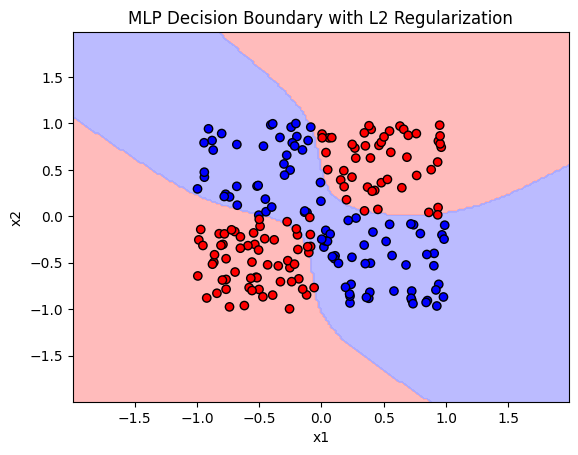

In [114]:

mlp_l2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0, alpha=best_alpha, solver='adam', activation='tanh')
mlp_l2.fit(X_train, y_train)
print(f"MLP accuracy: {mlp_l2.score(X_test, y_test)}")
plot_decision_surface(mlp_l2, X_test, y_test, title="MLP Decision Boundary with L2 Regularization")

Logistic regression with additional features accuracy: 0.95


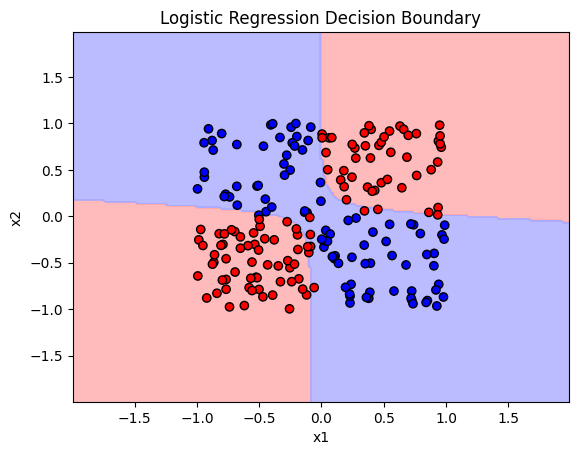

In [115]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_poly, y_train)
print("Logistic regression with additional features accuracy:", log_reg.score(X_test_poly, y_test))

plot_decision_surface_logistic(log_reg, X_test_poly, y_test, title="Logistic Regression Decision Boundary", poly=poly)
